<a href="https://colab.research.google.com/github/Sunantha17/Healthiness_prediction/blob/Tensor-flow/Healthiness_prediction_using_Tensor_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
!pip install mlend --upgrade

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

from mlend import download_yummy_small, yummy_small_load

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.4 MB/s eta 0:00:00


In [2]:
import spkit as sp
import IPython.display as ipd
from tqdm import tqdm
import librosa

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading and preproccessing the dataset

In [4]:
mlend_dataset = pd.read_csv("/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_image_attributes_small.csv")
train_dataset = mlend_dataset['Benchmark_A'] == 'Train'
test_dataset = mlend_dataset['Benchmark_A'] == 'Test'

# Use the masks to filter the DataFrame
train_data = mlend_dataset[train_dataset]
test_data = mlend_dataset[test_dataset]

# Display the filtered DataFrames
print("Train Data:")
print(train_data.shape)

print("\nTest Data:")
print(test_data.shape)

Train Data:
(70, 10)

Test Data:
(29, 10)


In [5]:
ofile = '/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images_small/'
X_train_paths = []
X_test_paths = []
for i,im in train_data.iterrows():
  X_train_paths.append(ofile+train_data.loc[i,'filename'])
for i,im in test_data.iterrows():
  X_test_paths.append(ofile+test_data.loc[i,'filename'])

In [6]:
#def load_data():
    # Download and load dataset
   # baseDir = download_yummy_small(save_to='/content/drive/MyDrive/Data/MLEnd')
MLENDYD_df = pd.read_csv('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_image_attributes_small.csv').set_index('filename')

MLENDYD_df

,Dish_name,Home_restaurant,Cuisine,Ingredients,Diet,Healthiness_rating,How_much_did_you_like_it,Rice_Chips,Benchmark_A
filename,,,,,,,,,
00001.jpg,steak_&_fries,resturaunt,american,"steak,fries,mixed_salad",non-veg,neutral,strongly_like,chips,Test
00002.jpg,beef_burger_meal,restaurant,american,"chips,burger,chicken_nugget",non-veg,unhealthy,like,chips,Train
00003.jpg,chicken_burger_with_fries_and_wings,restaurant,american,"fried_chicken_breast,lettuce,ketchup,sesame_se...",non-veg,unhealthy,like,chips,Train
00004.jpg,fried_rice_with_curd,home,indian,"rice,onion,potato,tomato,olive_oil,curd",vegetarian,neutral,like,rice,Train
00005.jpg,fish_and_chips,tcr_bar,british,"cod,beer,flour,tartare_sauce,peas,oil",vegetarian,neutral,strongly_like,chips,Test
...,...,...,...,...,...,...,...,...,...
00095.jpg,breaded_chicken_with_katsu_curry_sauce_rice_&_...,the_curve,japanese,"chicken,curry,rice,greens,bell_pepper",non-veg,healthy,strongly_like,rice,Train
00096.jpg,chicken_wrap_with_fries,roosters_piri_piri,portuguese,"tortilla_wrap,chicken,olive_oil,piri_piri_sauc...",non-veg,healthy,strongly_like,chips,Train
00097.jpg,butter_chicken,restaurant,indian,"garlic,tomato,onion,white_rice,naan_bread,cash...",non-veg,neutral,like,rice,Train


In [7]:
#Impute missing values
imputer = SimpleImputer(strategy='most_frequent')
MLENDYD_df['Healthiness_rating'] = imputer.fit_transform(MLENDYD_df[['Healthiness_rating']])

In [8]:
    # Add a new column 'image_paths' to the DataFrame
image_paths = []
for root, dirs, files in os.walk('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images_small'):
  for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
           image_paths.append(os.path.join(root, file))
MLENDYD_df['image_paths'] = image_paths



# Splitting the dataset (Train and Test)

In [9]:
def split_data(df):
    # Splitting the DataFrame based on 'benchmark_A'

    train_df = df[df['Benchmark_A'] == 'Train']
    test_df = df[df['Benchmark_A'] == 'Test']

    # Print information about the split
    print(f'Training set size: {len(train_df)}')
    print(f'Testing set size: {len(test_df)}')

    return train_df, test_df


# Display some pictures of the dataset

In [10]:
#Impute missing values
imputer = SimpleImputer(strategy='most_frequent')
mlend_dataset['Healthiness_rating'] = imputer.fit_transform(mlend_dataset[['Healthiness_rating']])

# Assuming 'healthiness' is the column containing the healthiness labels in your DataFrame
labels = mlend_dataset['Healthiness_rating'].unique()

# Print the unique values
print("Unique Healthiness Labels:", labels)


Unique Healthiness Labels: ['neutral' 'unhealthy' 'very_unhealthy' 'healthy' 'very_healthy']


In [11]:
def display_images(train_df):
    # Display some pictures of the dataset with 5 unique class values
    df_unique = train_df.copy().drop_duplicates(subset=["Healthiness_rating"]).reset_index()

    # Select 5 unique class values
    unique_classes = df_unique['Healthiness_rating'].unique()[:5]

    # Filter DataFrame to include only the selected classes
    df_filtered = df_unique[df_unique['Healthiness_rating'].isin(unique_classes)]

    fig, axes = plt.subplots(nrows=1, ncols=len(unique_classes), figsize=(15, 3),
                             subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes):
        ax.imshow(plt.imread(df_filtered.image_paths.iloc[i]))
        ax.set_title(df_filtered['Healthiness_rating'].iloc[i], fontsize=12)

    plt.tight_layout(pad=0.5)
    plt.show()




# Feature extraction

In [12]:
from skimage.feature import ORB
from skimage.feature import graycomatrix, graycoprops
from skimage import io, color

def get_yellow_component(I,t1=27, t2=33):
  Ihsv = (rgb2hsv(I)*255).astype('uint8')
  mask = (Ihsv[:,:,0]<t2)*(Ihsv[:,:,0]>t1)
  Ypx = mask.sum()
  return Ypx

def GMLC_features(I):
  Ig = (rgb2gray(I)*255).astype('uint8')
  glcm = graycomatrix(Ig, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
  f1 = graycoprops(glcm, 'dissimilarity')[0, 0]
  f2 = graycoprops(glcm, 'correlation')[0, 0]
  return f1,f2



def compute_color_moments(image):
    # Convert the image to the Lab color space
    lab_image = color.rgb2lab(image)

    # Extract color channels
    l_channel, a_channel, b_channel = lab_image[:,:,0], lab_image[:,:,1], lab_image[:,:,2]

    # Calculate mean, variance, and skewness for each channel
    mean_l, mean_a, mean_b = np.mean(l_channel), np.mean(a_channel), np.mean(b_channel)
    var_l, var_a, var_b = np.var(l_channel), np.var(a_channel), np.var(b_channel)
    # skewness_l, skewness_a, skewness_b = skewness(l_channel), skewness(a_channel), skewness(b_channel)

    # Create a feature vector with color moments
    # color_moments = [mean_l, mean_a, mean_b, var_l, var_a, var_b, skewness_l, skewness_a, skewness_b]
    color_moments = [mean_l, mean_a, mean_b, var_l, var_a, var_b ]
    return color_moments

In [13]:


X_train = []

for k, file in enumerate(X_train_paths):
    sp.utils.ProgBar_JL(k, len(X_train_paths), L=50, color='blue')

    # Read the image using plt.imread
    I = plt.imread(file)

    # Resize the image
    # I_resized = cv2.resize(I, (200, 200))  # Assuming you have OpenCV available

    # If you don't have OpenCV, you can use PIL for resizing:
    # I_resized = Image.fromarray(I).resize((200, 200))

    X_train.append(I)

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|70\70|
Done!


# Image Data Generator for train and test data set

In [14]:
def train_image_generator(train_df):

  train_generator = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)


  train_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='image_paths',
        y_col='Healthiness_rating',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
        seed=0)

  return train_images





In [15]:
def test_image_generator(test_df):

  test_generator = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)


  test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='image_paths',
    y_col='Healthiness_rating',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False)

  return test_images

# Build and train the model

In [16]:
def build_and_train_model(train_images):
    # Build and train the model
    pretrained_model = tf.keras.applications.MobileNetV2(
        input_shape=(224, 224, 3),
        include_top=False,
        weights='imagenet',
        pooling='avg'
    )
    pretrained_model.trainable = False

    inputs = pretrained_model.input
    x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    outputs = tf.keras.layers.Dense(5, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        train_images,
        batch_size=32,
        epochs=5,
    )

    return model


# Predict the label of the test_images

In [17]:
def predict_labels(model, test_images):
    # Predict the label of the test_images
    pred = model.predict(test_images)
    pred = np.argmax(pred, axis=1)

    # Map the label
    labels = (test_images.class_indices)
    labels = dict((v, k) for k, v in labels.items())
    pred_labels = [labels[k] for k in pred]

    return pred_labels

# Function to predict labels for a given image path

In [18]:
def output(location, model):
    img = load_img(location, target_size=(224, 224, 3))
    img = img_to_array(img)
    img = img / 255
    img = np.expand_dims(img, [0])
    answer = model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

Training set size: 70
Testing set size: 29


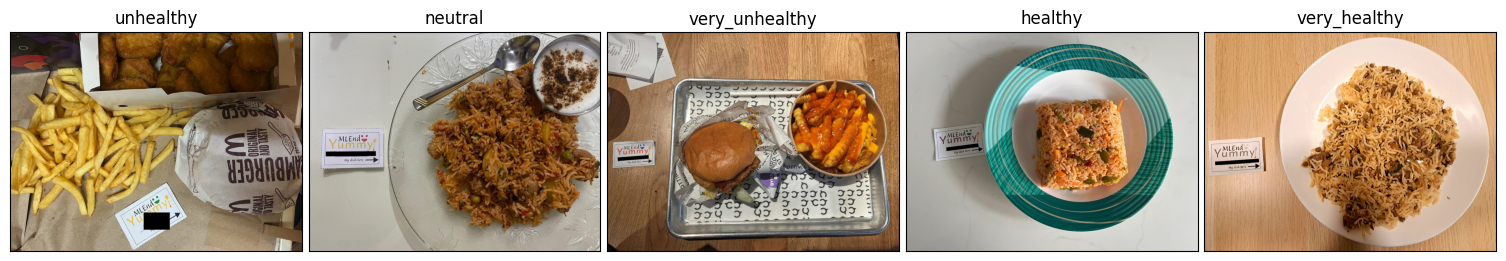

Found 70 validated image filenames belonging to 5 classes.
Found 29 validated image filenames belonging to 5 classes.
9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/5
3/3 [==============================] - 9s 1s/step - loss: 1.7402 - accuracy: 0.2143
Epoch 2/5
3/3 [==============================] - 5s 995ms/step - loss: 1.1725 - accuracy: 0.5714
Epoch 3/5
3/3 [==============================] - 6s 2s/step - loss: 0.9441 - accuracy: 0.8000
Epoch 4/5
3/3 [==============================] - 6s 1s/step - loss: 0.7444 - accuracy: 0.9000
Epoch 5/5
3/3 [==============================] - 5s 2s/step - loss: 0.5456 - accuracy: 0.9571


In [19]:


# Split Data
train_df, test_df = split_data(MLENDYD_df)

#Displaying few train Images with unique categorical labels
display_images(train_df)

#Prepare train and test data
train_images = train_image_generator(train_df)
test_images = test_image_generator(test_df)

#Build and Train Model
model = build_and_train_model(train_images)

# Main pipeline

In [20]:
def main_pipeline():


    # Step 7: Predict Labels
    labels = predict_labels(model, test_images)
    print(labels)

    # Step 8: Output Prediction for a Sample Image
    return model



# Run the Main pipeline

In [21]:
labels = predict_labels(model, test_images)
print(labels)


1/1 [==============================] - 3s 3s/step
['healthy', 'neutral', 'healthy', 'healthy', 'neutral', 'healthy', 'healthy', 'very_healthy', 'healthy', 'neutral', 'neutral', 'very_healthy', 'healthy', 'healthy', 'neutral', 'healthy', 'neutral', 'neutral', 'neutral', 'healthy', 'healthy', 'unhealthy', 'healthy', 'very_healthy', 'very_healthy', 'healthy', 'healthy', 'unhealthy', 'healthy']


In [22]:
# Run the main pipeline
model = main_pipeline()


1/1 [==============================] - 2s 2s/step
['healthy', 'neutral', 'healthy', 'healthy', 'neutral', 'healthy', 'healthy', 'very_healthy', 'healthy', 'neutral', 'neutral', 'very_healthy', 'healthy', 'healthy', 'neutral', 'healthy', 'neutral', 'neutral', 'neutral', 'healthy', 'healthy', 'unhealthy', 'healthy', 'very_healthy', 'very_healthy', 'healthy', 'healthy', 'unhealthy', 'healthy']


In [25]:
# labels = (test_images.class_indices)
# labels = dict((v, k) for k, v in labels.items())
img = output('/content/sandwich.jpeg', model)
print(img)


1/1 [==============================] - 0s 51ms/step
healthy
